In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()



/home/kang/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/kang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/kang/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/kang/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/kang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.laun

In [19]:
rv = sp.stats.norm()
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

In [20]:
rv = sp.stats.norm(loc = 1, scale = 2)

In [22]:
theta = 0.6
rv = sp.stats.bernoulli(theta)

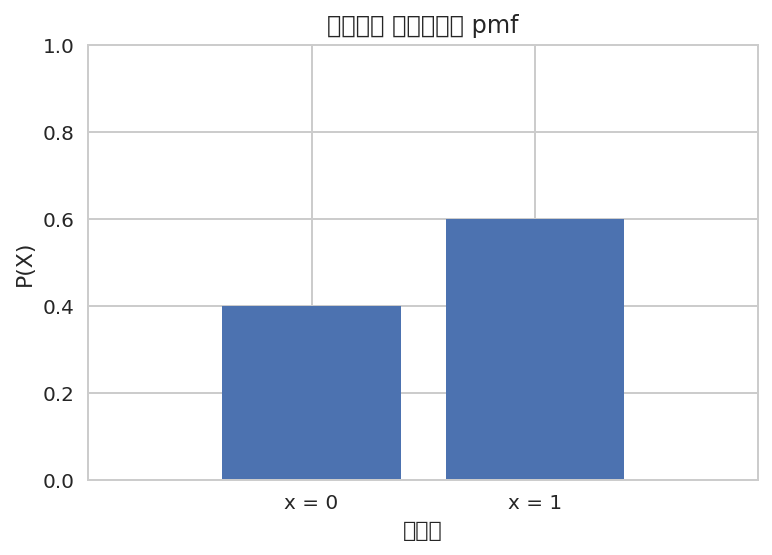

In [26]:
xx = [0,1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x = 0", "x = 1"])
plt.xlabel("표본값")
plt.ylabel("P(X)")
plt.title("베르누이 확률변수의 pmf")
plt.show()

In [27]:
x = rv.rvs(100, random_state = 0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

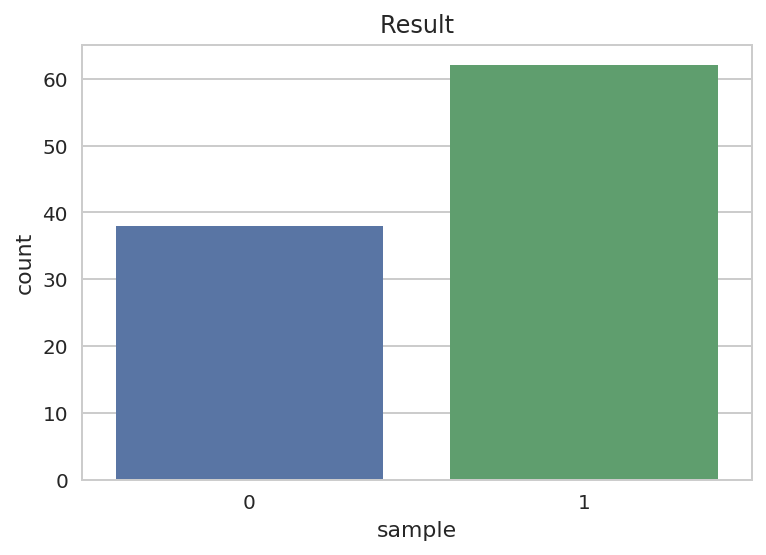

In [39]:
sns.countplot(x)
plt.title("Result")
plt.xlabel("sample")
plt.show()

In [30]:
y = np.bincount(x, minlength = 2) / float(len(x))
df = pd.DataFrame({"이론" : rv.pmf(xx), "시뮬레이션" : y})
df.index = [0, 1]
df

,시뮬레이션,이론
0,0.38,0.4
1,0.62,0.6


In [31]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,시뮬레이션,0.38
1,0,이론,0.40
2,1,시뮬레이션,0.62
3,1,이론,0.60


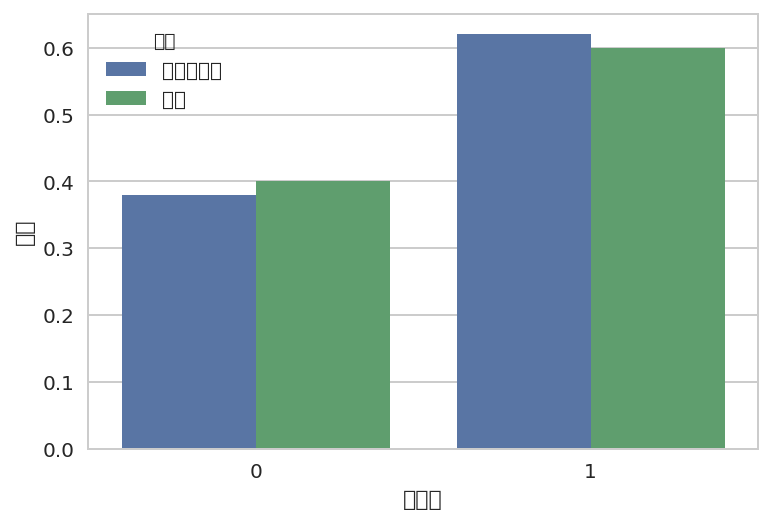

In [32]:
sns.barplot(x = "표본값", y = "비율", hue = "유형", data = df2)
plt.show()

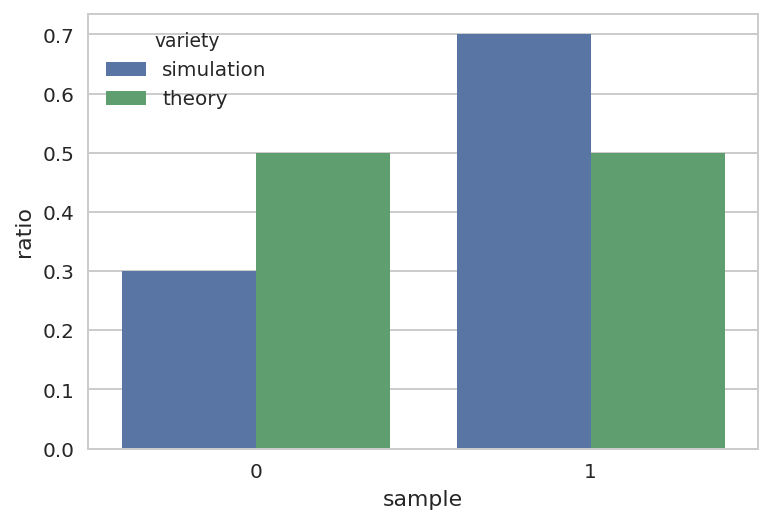

In [53]:
# theta 가 0.5인 경우 & sample  수가 10개인 경우
theta = 0.5
rv = sp.stats.bernoulli(theta)
x = rv.rvs(10, random_state = 0)

y = np.bincount(x, minlength = 2) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample", "variety", "ratio"]
df2

sns.barplot(x = "sample", y = "ratio", hue = "variety", data = df2)
plt.show()

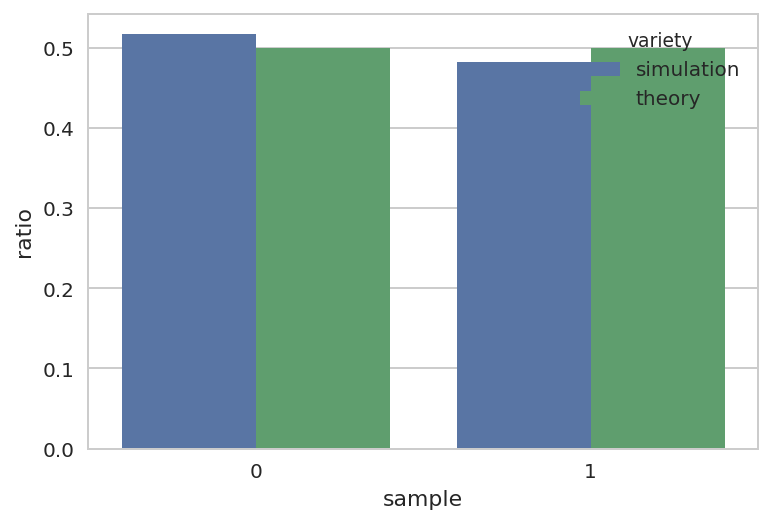

In [56]:
# theta 가 0.5인 경우 & sample  수가 1000개인 경우
theta = 0.5
rv = sp.stats.bernoulli(theta)
x = rv.rvs(1000, random_state = 0)
y = np.bincount(x, minlength = 2) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample", "variety", "ratio"]
sns.barplot(x = "sample", y = "ratio", hue = "variety", data = df2)
plt.show()

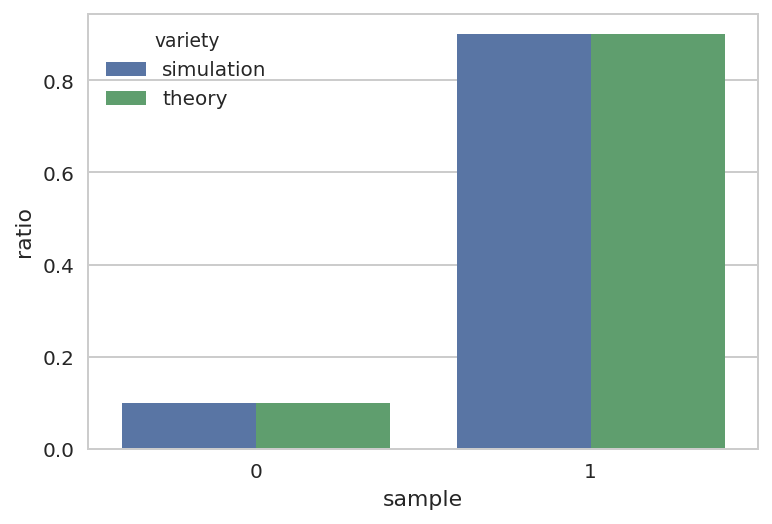

In [57]:
# theta 가 0.9인 경우 & sample  수가 10개인 경우
theta = 0.9
rv = sp.stats.bernoulli(theta)
x = rv.rvs(10, random_state = 0)
y = np.bincount(x, minlength = 2) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample", "variety", "ratio"]
sns.barplot(x = "sample", y = "ratio", hue = "variety", data = df2)
plt.show()

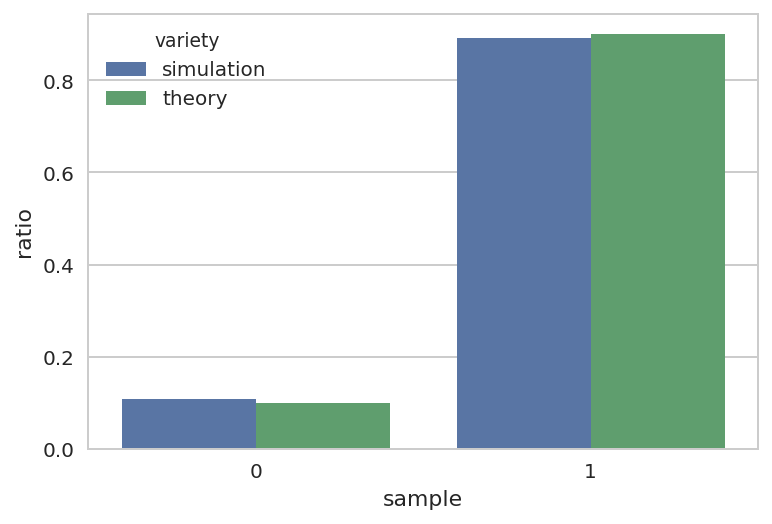

In [59]:
# theta 가 0.9인 경우 & sample  수가 1000개인 경우
theta = 0.9
rv = sp.stats.bernoulli(theta)
x = rv.rvs(1000, random_state = 0)
y = np.bincount(x, minlength = 2) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulationrv = sp.stats.bernoulli(theta)" : y})
df.index = [0, 1]
df2 = df.stack().reset_index()
df2.columns = ["sample", "variety", "ratio"]
sns.barplot(x = "sample", y = "ratio", hue = "variety", data = df2)
plt.show()

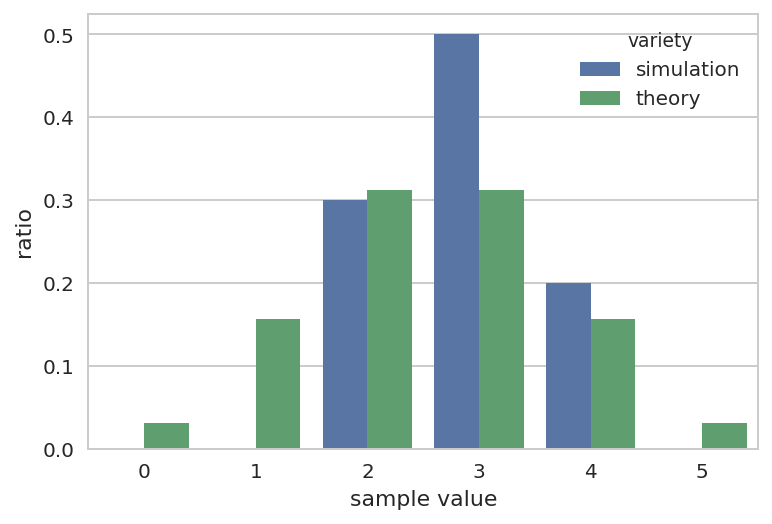

In [72]:
# theta = 0.5, N = 5, sample = 10
N = 5 
theta = 0.5
rv = sp.stats.binom(N, theta)
np.random.seed(0)
x = rv.rvs(10)
xx = np.arange( N + 1)
y = np.bincount(x, minlength = N + 1) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y}).stack()
df = df.reset_index()
df.columns = ["sample value", "variety", "ratio"]
df.pivot("sample value", "variety", "ratio")
sns.barplot(x = "sample value", y = "ratio", hue = "variety", data = df)
plt.show()

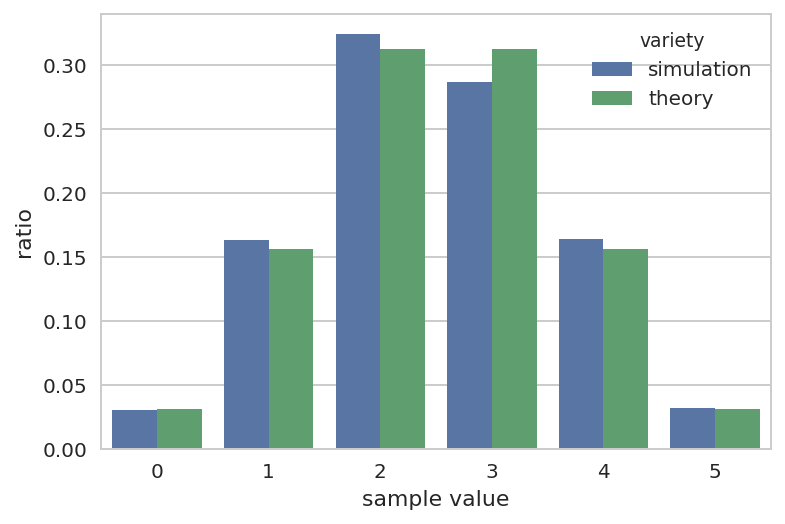

In [73]:
# theta = 0.5, N = 5, sample = 1000
N = 5 
theta = 0.5
rv = sp.stats.binom(N, theta)
np.random.seed(0)
x = rv.rvs(1000)
xx = np.arange( N + 1)
y = np.bincount(x, minlength = N + 1) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y}).stack()
df = df.reset_index()
df.columns = ["sample value", "variety", "ratio"]
df.pivot("sample value", "variety", "ratio")
sns.barplot(x = "sample value", y = "ratio", hue = "variety", data = df)
plt.show()

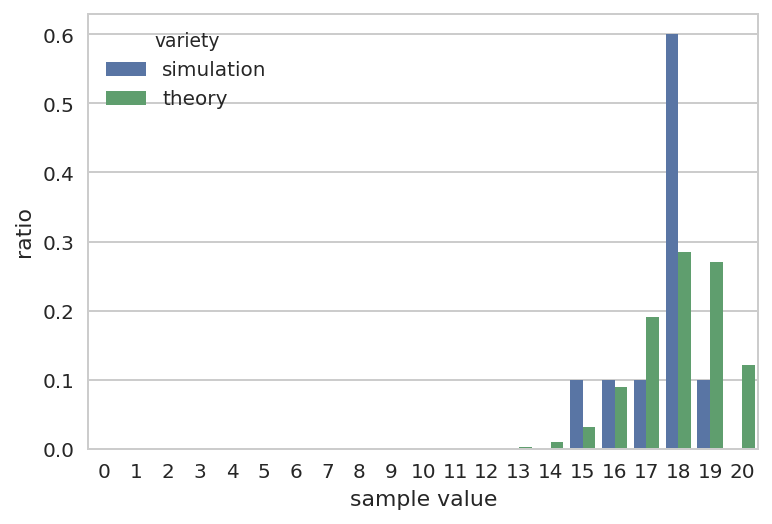

In [74]:
# theta = 0.9, N = 20, sample = 10
N = 20 
theta = 0.9
rv = sp.stats.binom(N, theta)
np.random.seed(0)
x = rv.rvs(10)
xx = np.arange( N + 1)
y = np.bincount(x, minlength = N + 1) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y}).stack()
df = df.reset_index()
df.columns = ["sample value", "variety", "ratio"]
df.pivot("sample value", "variety", "ratio")
sns.barplot(x = "sample value", y = "ratio", hue = "variety", data = df)
plt.show()

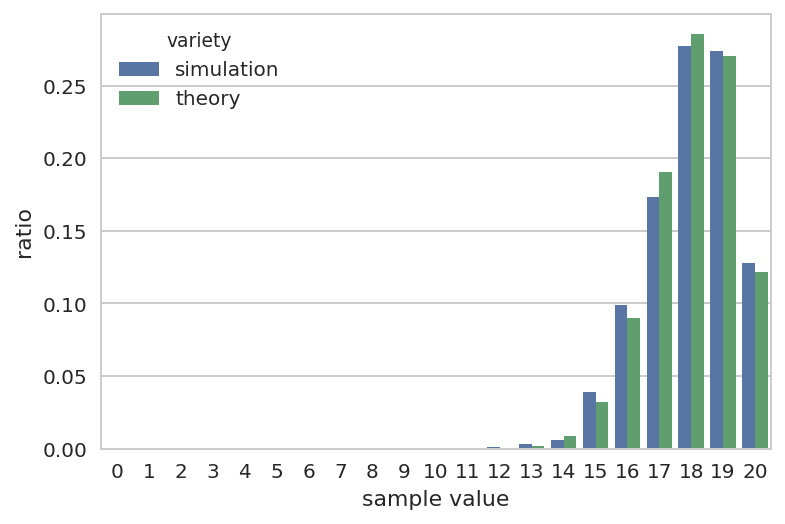

In [75]:
# theta = 0.9, N = 20, sample = 1000
N = 20
theta = 0.9
rv = sp.stats.binom(N, theta)
np.random.seed(0)
x = rv.rvs(1000)
xx = np.arange( N + 1)
y = np.bincount(x, minlength = N + 1) / float(len(x))
df = pd.DataFrame({"theory" : rv.pmf(xx), "simulation" : y}).stack()
df = df.reset_index()
df.columns = ["sample value", "variety", "ratio"]
df.pivot("sample value", "variety", "ratio")
sns.barplot(x = "sample value", y = "ratio", hue = "variety", data = df)
plt.show()